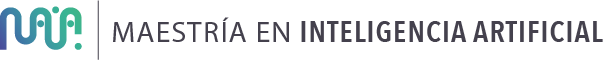

#### **IA Biomédica:** Laboratorio Sumativo PharmaNet


> ##### Descubrimiento de Farmacos


> **Instructores**

*  Julio Castellanos


## Taller de Entrenamiento e Inferencia con PharmaNet

En este laboratorio, trabajaremos con el dataset DUDE para entrenar un modelo **PharmaNet** y realizar **inferencia** sobre datos nuevos. El objetivo principal es que realices los pasos propuestos **a forma de taller**, completando secciones de código donde se indique para reforzar tu aprendizaje práctico. Usa el Notebook del "Laboratorio: Uso Avanzado para el Descubrimiento de Fármacos" como referencia.

## **Problema**
En este taller, entrenarás un modelo con **2 folds** (dos particiones diferentes de entrenamiento y validación) sobre al menos **10 targets** que elijas del dataset DUDE. Además, agregarás un **target nuevo** (que no existe en los datos proporcionados originalmente) usando datos (posiblemente sintéticos) o SMILES obtenidos de alguna base (por ejemplo, **RCSB PDB**).

Al finalizar, **compararás las métricas** entre los dos modelos resultantes y también con el modelo base presentado en el paper original. Finalmente, **comentarás** las diferencias observadas.

### Pasos Generales:
1. Configurar entorno e importar librerías.
2. Descargar/preparar los datos del dataset DUDE.
3. Seleccionar y filtrar al menos 10 targets diferentes.
4. Incluir un target extra, no presente en DUDE, con datos sintéticos o reales.
5. Generar archivos `train.csv` y `test.csv` para **dos folds distintos**.
6. Definir el modelo y sus hiperparámetros.
7. Entrenar el modelo para cada fold.
8. Evaluar e inferir usando cada modelo entrenado.
9. Visualizar la distribución de probabilidades y comparar métricas.
10. Concluir sobre los resultados y diferencias entre modelos.





In [ ]:
from __future__ import division, print_function

import copy
import os
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from tqdm import tqdm

# Modulos propios (asegúrate de tener estas rutas en tu proyecto)
from data.data_loader import SMILESDataset
from utils.metrics import pltauc, norm_ap_optimized
from models.Model import Model


print("PyTorch Version: ", torch.__version__)

### Lectura de Datos

En esta sección, leerás los datos del dataset DUDE. Normalmente se proveen varios archivos CSV que corresponden a SMILES y etiquetas para diferentes targets.

In [ ]:
# =============================================================================
# TODO: En esta sección, carga los datos de DUDE (ej. Smiles_1.csv, Smiles_2.csv, etc.)
# y concatena la información necesaria en un DataFrame.
# =============================================================================

# Ejemplo (ajusta rutas según tu organización de archivos):
# train_path = "data/datasets/DUDE/"
# df1 = pd.read_csv(train_path + "Smiles_1.csv")
# df2 = pd.read_csv(train_path + "Smiles_2.csv")
# ...

# data_all = pd.concat([df1, df2, ...], ignore_index=True)
# print("Total de ejemplos:", len(data_all))

### Selección, Filtrado de Targets y Creación de Folds

1. Elige al menos 10 targets del conjunto DUDE que desees estudiar.
2. Define un diccionario label_mapping para asignar índices a cada target.
3. Agrega un target nuevo que no exista en DUDE. Puedes usar datos sintéticos o reales (por ejemplo, SMILES de alguna proteína en RCSB PDB).
4. Crea dos folds:
   - Fold 1: Entrenamiento y Test con cierto split de los datos
   - Fold 2: Diferente partición de Entrenamiento y Test

Guarda tus archivos train_data.csv y test_data.csv en carpetas separadas (por ejemplo, Fold1 y Fold2).

In [ ]:
# =============================================================================
# TODO: En esta sección, selecciona tus targets, crea 'label_mapping', filtra
# los datos, y genera los archivos CSV de train y test para cada fold.
# IMPORTANTE: Ajusta tu propia lógica de split (ej. 80/20) o la que necesites.
# =============================================================================

# Ejemplo:
# targets_to_keep = ['fabp4', 'kith', 'cxcr4', 'comt', 'hmdh', 'akt1', 'ada17', 'TExtra']
# label_mapping = {'fabp4': 0, 'kith': 1, 'cxcr4': 2, 'comt': 3, 'hmdh': 4, 'akt1': 5, 'ada17': 6, 'TExtra': 7}

# filtered_data = data_all[data_all['Target'].isin(targets_to_keep)]
# filtered_data['Label'] = filtered_data['Target'].map(label_mapping)

# # Ejemplo de split simple:
# from sklearn.model_selection import train_test_split
# train_split, test_split = train_test_split(filtered_data, test_size=0.2, random_state=42)
# train_split.to_csv("Fold1/train_data.csv", index=False)
# test_split.to_csv("Fold1/test_data.csv", index=False)

# # Crea una segunda partición (Fold2)
# train_split2, test_split2 = train_test_split(filtered_data, test_size=0.2, random_state=123)
# train_split2.to_csv("Fold2/train_data.csv", index=False)
# test_split2.to_csv("Fold2/test_data.csv", index=False)

### Definición de la Red Neuronal (PharmaNet)

Esta sección describe la arquitectura del modelo. Usa una instancia la clase `Model(...)` en el codigo adjunto al taller. Tambien define el Optimizador y la Función de Pérdida

In [ ]:
# =============================================================================
# TODO: Define aquí tu clase 'Model' o importa una clase ya existente
# Ajusta hiperparámetros como hidden_size, num_layers, etc.
# =============================================================================

### Preparación de Datasets y DataLoaders

Para entrenar, se requiere convertir crear el dataset, usa la clase `SMILESDataset`. Asegurate de extraer el tamaño del vocabulario y Embeddings.

In [1]:
# =============================================================================
# TODO: Define o importa tu clase SMILESDataset para procesar la columna 'Smiles'
# y convertir cada carácter en un índice según un diccionario char_to_int
# =============================================================================

# =============================================================================
# TODO: Determina el 'charset' (caracteres únicos) y crea 'char_to_int', 
# y luego instancia tus DataLoaders
# =============================================================================

# charset = set("".join(list(train_data.Smiles)) + "".join(list(test_data.Smiles)))
# char_to_int = {c: i for i, c in enumerate(charset)}
# vocab_size = len(charset)
# embed = max_length_sonrisa  # la longitud maxima de SMILES

# train_dataset = SMILESDataset(train_data, vocab_size, char_to_int, embed)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# test_dataset = SMILESDataset(test_data, vocab_size, char_to_int, embed)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### Entrenamiento (dos folds)

En esta fase, define tu función train(...) y tu función evaluate(...) (o valida en cada epoch). Se sugiere usar un criterio de pérdida como nn.BCELoss (si tu salida es sigmoid)

Realiza el procedimiento de entrenamiento para cada fold. Tendrás dos modelos distintos al final (model_fold1.pth y model_fold2.pth)

In [ ]:
# =============================================================================
# TODO: Implementa la lógica de entrenamiento con funciones train() y evaluate().
# Puedes inspirarte en el código base, usando optim.Adam, etc.
# Recuerda entrenar con ambos folds y guardar cada modelo resultante.
# =============================================================================

### Inferencia y Métricas

Tras entrenar tu modelo en ambos folds, es hora de realizar inferencia. Carga cada modelo por separado, realiza predicciones sobre el conjunto de test correspondiente. Luego, genera métricas como NAP, MAP, AUC, Accuracy, F-measure, o las que consideres necesarias.


In [2]:
# =============================================================================
# TODO: Carga tus dos modelos entrenados ('model_fold1.pth' y 'model_fold2.pth')
# y realiza la inferencia sobre cada test_set.
# =============================================================================

# =============================================================================
# TODO: Implementa o llama funciones para calcular AUC, F1, etc. 
# Compara con el "modelo base" del paper (si tienes datos de referencia).
# =============================================================================

### Visualización de la Distribución de Probabilidades

Para cada muestra, podemos graficar la distribución de probabilidades que el modelo asigna a cada clase/target. Se te provee el siguiente ejemplo de función (plot_predictions). Asegúrate de modificar o ajustar para que muestre las clases correctas.

In [ ]:
# =============================================================================
# TODO: Usa la función plot_predictions o crea la tuya propia para 
# mostrar las probabilidades de cada clase para un subconjunto de ejemplos.
# =============================================================================


### Comparación y Conclusiones

Finalmente, compara las métricas de:
- Fold 1
- Fold 2
- Modelo Base presentado en el paper
  
Discute:
- Diferencias en la exactitud, AUC, F1, NAP, etc.
- Posibles causas de esas diferencias (variabilidad, calidad de datos, hiperparámetros).
- Efecto de haber agregado un nuevo target (¿afectó negativamente/positivamente al resto?).
- Conclusiones finales y próximos pasos.

### Fin del Taller 🎉

¡Felicidades! Has completado un flujo avanzado para entrenar e inferir con PharmaNet sobre datos DUDE (con al menos 10 targets y un target nuevo). A partir de aquí, puedes experimentar con distintos hiperparámetros, arquitecturas, y técnicas de augmentación de datos para mejorar el rendimiento de tu modelo.
